# K Means Clustering Plus Plus

Sources:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca

In this notebook we shall be evaluating k-means++. This form of k-means distinguishes itself from its regular counterpart by means of choosing seeds (initial values) in a different manner. In the traditional K-Means algorithms, the starting postitions of the centroids are intialized completely randomly. This can result in suboptimal clusters.

In the same way we would want to avoid optimising to a saddle point if we wanted to find the global minimum, k means also has a tendency to make suboptimal optimisations, depending on the starting point of the centroid. As a result the plusplus version selects its initial values for the centroid in a different manner to prevent suboptimal clustering.

# Algorithm

The Step 1 of the K-Means algorithm is “Place k random centroids for the initial clusters”.

The K-Means++ algorithm replaces Step 1 of the K-Means algorithm and adds the following:

1. The first cluster centroid is randomly picked from the data points.

2. For each remaining data point, the distance from the point to its nearest cluster centroid is calculated.

3. The next cluster centroid is picked according to a probability proportional to the distance of each point to its nearest cluster centroid. This makes it likely for the next cluster centroid to be far away from the already initialized centroids.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [21]:
# std deviation of the distribution of randomness
std = 0.5

x = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.75,std,100)), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100))
y = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100)), np.random.normal(0.75,std,100))

values = np.array(list(zip(x, y)))

centroids_x = [2.5, 2.5]
centroids_y = [1, 3]



In [22]:
centroids = np.array(list(zip(centroids_x, centroids_y)))

model_custom = KMeans(init=centroids, n_clusters=2)
results_custom = model_custom.fit_predict(values)

/Users/charlesvalenciaevans/opt/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [23]:
model = KMeans(init='k-means++', n_clusters=2)
results = model.fit_predict(values)

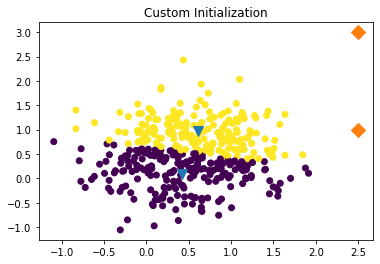

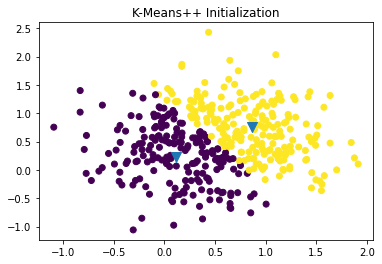

The custom model's inertia is 164.3754917926721
The K-means++ model's inertia is 160.7030342941701


In [24]:
plt.scatter(x, y, c=results_custom, alpha=1)
plt.scatter(model_custom.cluster_centers_[:, 0], model_custom.cluster_centers_[:, 1], marker='v', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)
plt.title('Custom Initialization')
plt.show()
plt.cla()

plt.scatter(x, y, c=results, alpha=1)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)
plt.title('K-Means++ Initialization')
plt.show()

print("The custom model's inertia is " + str(model_custom.inertia_))
print("The K-means++ model's inertia is " + str(model.inertia_))